In [6]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |███▎                            | 30 kB 4.8 MB/s eta 0:00:01  Downloading seaborn-0.13.2-py3-none-any.whl (294 kB)
     |████████████████████████████████| 294 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 3.3 MB/s 
     |█                               | 235 kB 6.1 MB/s eta 0:00:02  Downloading matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
     |████████████████████████████████| 7.8 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 6.1 MB/s 
     |▏                               | 10 kB 4.2 MB/s eta 0:00:01Collecting fonttools>=4.22.0
     |████████████████████████████████| 2.9 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 5.0 MB/s eta 0:00:01
     |█████████████████████           | 163 kB 6.3 MB/s eta 0:00:01  Downloading contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
     |████████████████████████████████| 249

In [21]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


In [9]:
df = pd.read_csv('defects_data.csv')
print(df.head())

   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1          15  Structural    6/6/2024       Component     Minor   
1          2           6  Functional   4/26/2024       Component     Minor   
2          3          84  Structural   2/15/2024        Internal     Minor   
3          4          10  Functional   3/28/2024        Internal  Critical   
4          5          14    Cosmetic   4/26/2024       Component     Minor   

   inspection_method repair_cost  
0  Visual Inspection      245.47  
1  Visual Inspection       26.87  
2  Automated Testing      835.81  
3  Automated Testing      444.47  
4     Manual Testing      823.64  


In [ ]:
%pip install ydata-profiling


Defaulting to user installation because normal site-packages is not writeable
     |████                            | 40 kB 2.5 MB/s eta 0:00:01  Downloading pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
     |████████████████████████████████| 324 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 324 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 399 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 399 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 105 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 105 kB 6.4 MB/s eta 0:00:01
     |██▋                             | 235 kB 6.5 MB/s eta 0:00:01  Downloading minify_html-0.18.1-cp39-cp39-macosx_11_0_arm64.whl (2.8 MB)
     |████████████████████████████████| 2.8 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 6.5 MB/s eta 0:00:01
     |█████████████▉                  | 286 kB 6.4 MB/s eta 0:00:01  Downloading phik-0.12.5-cp39-cp39-m

In [14]:
# Diagnostic: verify kernel environment and package versions
import sys, importlib
print('python executable:', sys.executable)
for pkg in ('pandas','seaborn','ydata_profiling','pydantic'):
    try:
        m = importlib.import_module(pkg)
        print(pkg, getattr(m, '__version__', 'version attribute not found'))
    except Exception as e:
        print(pkg, 'not available or failed to import:', e)


python executable: /Library/Developer/CommandLineTools/usr/bin/python3
pandas 2.3.3
seaborn 0.13.2


/Users/dm/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ydata_profiling v4.17.0
pydantic 2.12.3


In [15]:
from ydata_profiling import ProfileReport
pf = ProfileReport(df)
pf.to_file("manufacturing_defects_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 708.38it/s]


In [ ]:
df.sample(10)
plt.show()


,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
787,788,41,Structural,1/25/2024,Component,Critical,Automated Testing,571.65
701,702,43,Cosmetic,4/20/2024,Component,Minor,Visual Inspection,878.23
938,939,92,Cosmetic,2/16/2024,Internal,Moderate,Visual Inspection,590.85
240,241,80,Structural,3/19/2024,Surface,Minor,Manual Testing,288.31
444,445,65,Functional,3/23/2024,Component,Minor,Manual Testing,481.11
604,605,63,Functional,5/27/2024,Surface,Moderate,Automated Testing,309.53
346,347,90,Functional,5/19/2024,Component,Minor,Visual Inspection,22.07
361,362,45,Structural,6/20/2024,Surface,Minor,Manual Testing,739.69
477,478,58,Functional,1/18/2024,Surface,Moderate,Visual Inspection,895.11
752,753,83,Cosmetic,1/8/2024,Surface,Critical,Visual Inspection,140.96


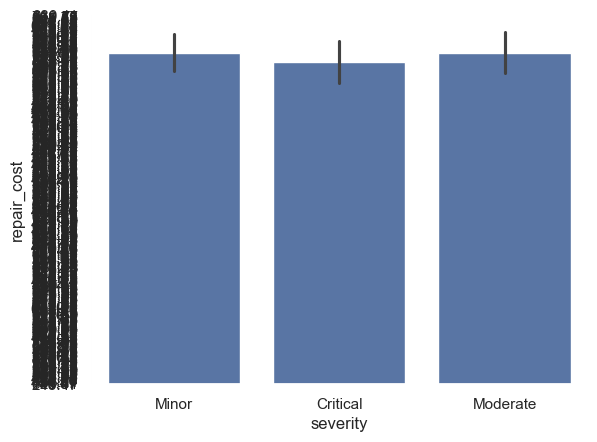

In [33]:
sns.barplot(x=df['severity'], y=df['repair_cost'] ).invert_yaxis()
plt.show()


In [32]:
pd.crosstab(df['defect_type'], df['severity'])

severity,Critical,Minor,Moderate
defect_type,,,
Cosmetic,107,106,96
Functional,115,113,112
Structural,112,139,101


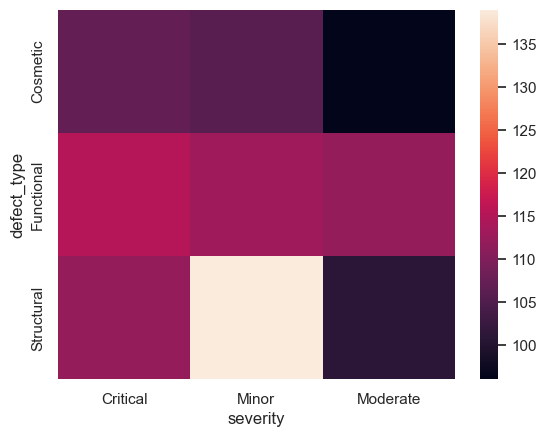

In [26]:
sns.heatmap(pd.crosstab(df['defect_type'], df['severity']))
plt.show()


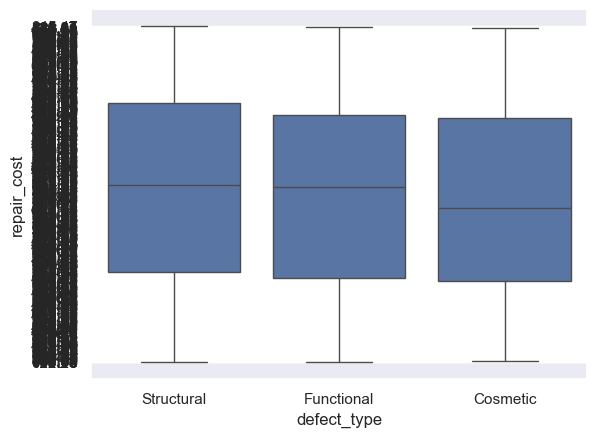

In [38]:
sns.boxplot(x='defect_type', y='repair_cost', data=df)
plt.show()

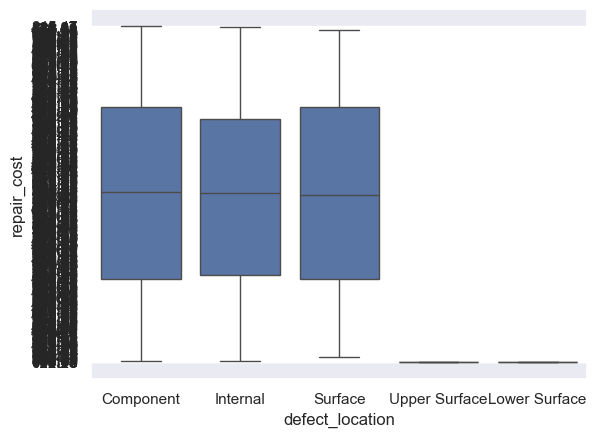

In [39]:
sns.boxplot(x='defect_location', y='repair_cost', data=df)
plt.show()

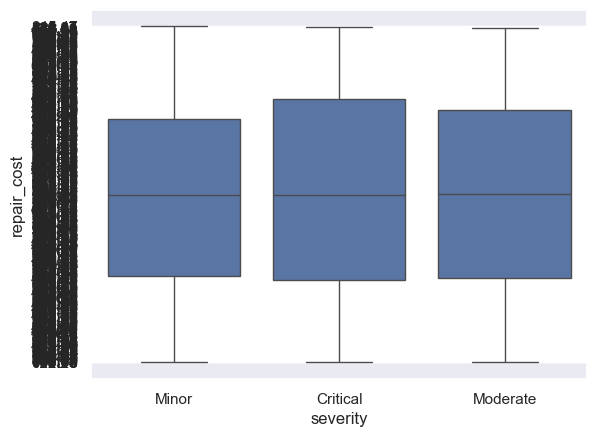

In [40]:
sns.boxplot(x='severity', y='repair_cost', data=df)
plt.show()